In [7]:
## Bag of Words 

In [9]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\win
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
import nltk
import re

nltk.download('punkt')

text = """Machine learning is transforming many industries today. Companies use data to build intelligent systems that can learn from experience. Machine learning models help in prediction, automation, and decision making. As data grows, machine learning becomes more powerful and important."""

dataset = nltk.sent_tokenize(text)

for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

for i, sentence in enumerate(dataset):
    print(f"Sentence {i+1}: {sentence}")


Sentence 1: machine learning is transforming many industries today 
Sentence 2: companies use data to build intelligent systems that can learn from experience 
Sentence 3: machine learning models help in prediction automation and decision making 
Sentence 4: as data grows machine learning becomes more powerful and important 


[nltk_data] Downloading package punkt to C:\Users\win
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\win
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import nltk
import pandas as pd
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

word2count = {}

for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

stop_words = set(stopwords.words('english'))

filtered_word2count = {
    word: count
    for word, count in word2count.items()
    if word not in stop_words
}

word_freq_df = pd.DataFrame(
    list(filtered_word2count.items()),
    columns=['Word', 'Frequency']
)

word_freq_df = word_freq_df.sort_values(
    by='Frequency', ascending=False
)

print(word_freq_df)


            Word  Frequency
0        machine          3
1       learning          3
8           data          2
13    experience          1
22      powerful          1
21       becomes          1
20         grows          1
19        making          1
18      decision          1
17    automation          1
16    prediction          1
15          help          1
14        models          1
12         learn          1
11       systems          1
10   intelligent          1
9          build          1
7            use          1
6      companies          1
5          today          1
4     industries          1
3           many          1
2   transforming          1
23     important          1


[nltk_data] Downloading package punkt to C:\Users\win
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\win
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Matplotlib is building the font cache; this may take a moment.


Top 10 frequent words: ['machine', 'learning', 'data', 'and', 'is', 'transforming', 'many', 'industries', 'today', 'companies']


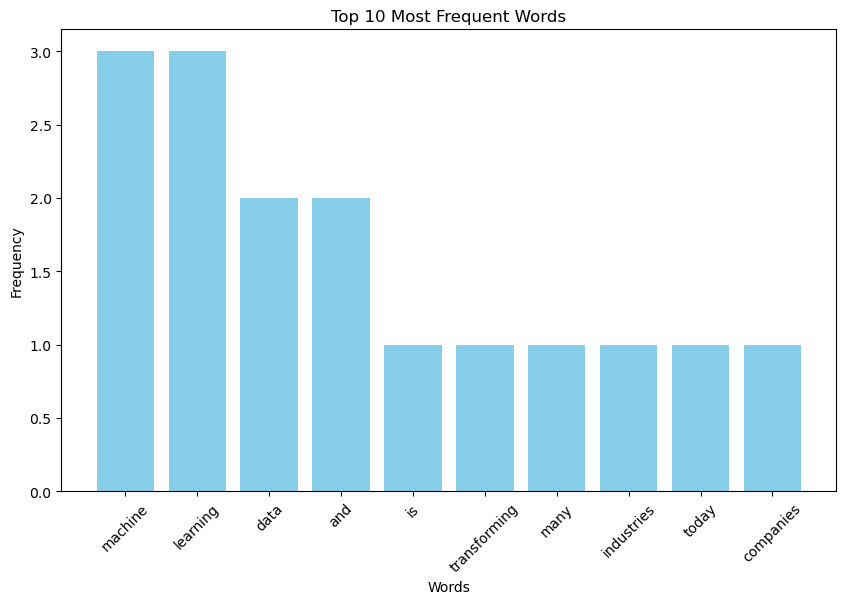

In [21]:
import heapq
import matplotlib.pyplot as plt

freq_words = heapq.nlargest(10, word2count, key=word2count.get)

print(f"Top 10 frequent words: {freq_words}")

top_words = sorted(word2count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

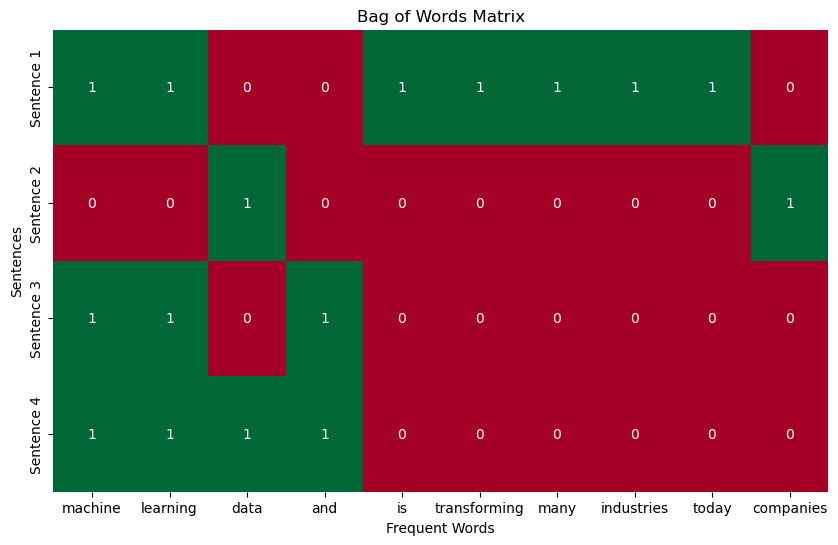

In [23]:
import numpy as np
import seaborn as sns

X = []

for data in dataset:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)

X = np.asarray(X)

plt.figure(figsize=(10, 6))
sns.heatmap(X, cmap='RdYlGn', cbar=False, annot=True, fmt="d", xticklabels=freq_words, yticklabels=[f"Sentence {i+1}" for i in range(len(dataset))])

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Sentences')
plt.show()

In [27]:
!pip install wordcloud


   ---------------------------------------- 0.0/307.3 kB ? eta -:--:--
   -------------------------------------- - 297.0/307.3 kB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 307.3/307.3 kB 6.3 MB/s eta 0:00:00


TypeError: asarray() got an unexpected keyword argument 'copy'

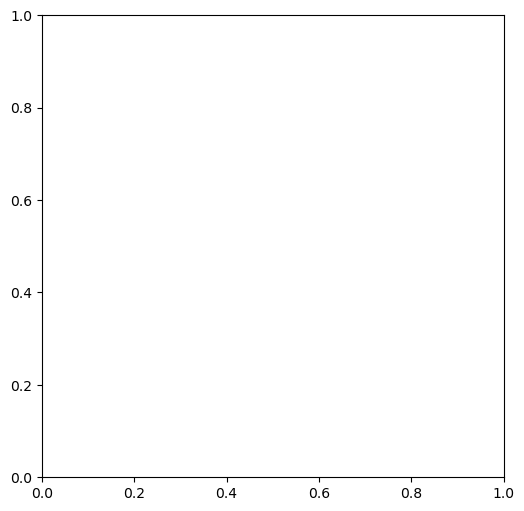

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word2count)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()
